In [1]:
%matplotlib inline 

import numpy as np
import scipy
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
from mpl_toolkits.mplot3d import Axes3D #3D plotting
import datetime as dt # module for manipulating dates and times

import requests 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import binom
from __future__ import division
import re
from StringIO import StringIO
from zipfile import ZipFile 
from pandas import read_csv
from urllib import urlopen
import urllib2
import json

import sklearn
import sklearn.preprocessing
import sklearn.datasets

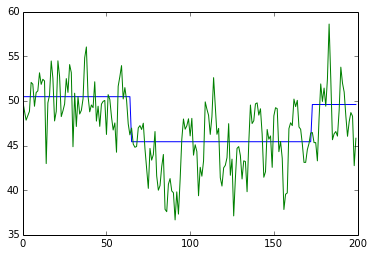

In [20]:
# LMSR Implementation Das Interpretation
# according to http://www.cse.wustl.edu/~mithunchakraborty/papers/AAAI15poster_final.pdf
iterations = 200
trial = np.zeros(1000)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    
    #outcome 1
    MMquantity_1 = np.zeros(iterations)
    MMquantity_1[0] = 0
    MMprice_1 = np.zeros(iterations)
    MMprice_1[0] = 50
    
    #outcome 2
    MMquantity_2 = np.zeros(iterations)
    MMquantity_2[0] = 0
    MMprice_2 = np.zeros(iterations)
    MMprice_2[0] = 50
    
    #revenue
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue > MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        quantityEquivalentprice = (np.log((traderValue/100)/(1-(traderValue/100)))*MMb-currentquantity)
        if quantityTrader < 0:
            quantityTrader = max(quantityTrader, quantityEquivalentprice)
        else:
            quantityTrader = min(quantityTrader, quantityEquivalentprice)
        MMquantity[time] = quantityTrader 
        newquantity = quantityTrader + currentquantity
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp(newquantity/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        MMprice[time] = 100*(np.exp(newquantity/MMb)/(1+np.exp(newquantity/MMb)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

102.897722331
1385.15006023
-6060.41157236


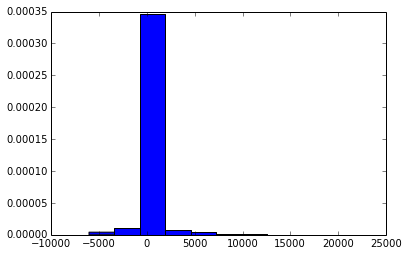

In [21]:
# Revenue Results 
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial, normed=1)
plt.show()

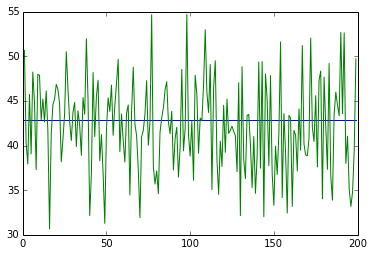

In [22]:
# LMSR Implementation Textbook Interpretation
iterations = 200
trial = np.zeros(1000)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue >= 100:
            traderValue = 99.99   
        # will trade till the instantaneous price is equal to trader's value 
        currentquantity = np.sum(MMquantity) 
        quantityTrader = (np.log((traderValue/100)/(1-(traderValue/100)))*MMb-currentquantity)
        MMquantity[time] = quantityTrader
        newquantity = quantityTrader + currentquantity
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp(newquantity/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        
        MMprice[time] = 100*(np.exp(newquantity/MMb)/(1+np.exp(newquantity/MMb)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)


73.9776054806
1369.77281044
-8663.0896945


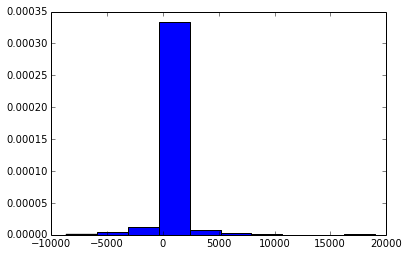

In [19]:
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial, normed=1)
plt.show()

In [ ]:
#Liquidity Sensitive LMSR Implementation Das Interpretation

iterations = 201
trial = np.zeros(100)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMquantity = np.zeros(iterations)
    #this is the initial subsidy
    MMquantity[0] = 10
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    alpha = 0.05
    
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue > MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        totalquantity = np.sum(np.abs(MMquantity))
        MMb = alpha*totalquantity
        MMquantity[time] = quantityTrader     
        newquantity = quantityTrader + currentquantity
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp(newquantity/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        # this equation for price may not be exactly correct - maybe we need to think of this as two stocks and 
        # not allow short selling, is this equivalent to a single stock with short selling?
        MMprice[time] = 100*(alpha*np.log(1+np.exp(newquantity/MMb)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

In [ ]:
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)

In [ ]:
''' 
# BMM implementation
iterations = 200
trial = np.zeros(1000)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = initialvalue
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    MMwindow = 5
    MMexpectedvalue = np.zeros(iterations)
    MMexpectedvalue[0] = initialvalue
    MMsdvalue = np.zeros(iterations)
    MMsdvalue[0] = 0
    MMsdvalue[1]
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue > MMprice[time - 1]:
            
            A = 
            B = 
            C = 
'''